<a href="https://colab.research.google.com/github/robcovino/MSDAP_notebooks/blob/main/Clustering2_Hierarchical_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Hierarchical clustering



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---
### Generating Random Data
Using the code developed in the previous notebook, use make_blobs to produce some synthetic data:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X1</b> and <b>y1</b>.

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X1, y1 = make_blobs(n_samples=50, random_state=0, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Q1. What data do X1 and y1 contain? Plot the scatter plot of the randomly generated data

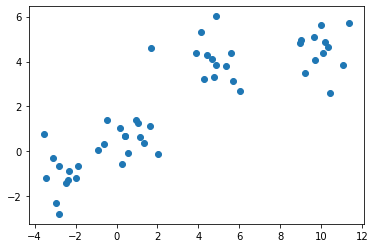

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

Q2. How would you visually cluster these data and why?

---
### Agglomerative Clustering
We will start by clustering the random data points we just created.

The <b> Agglomerative Clustering </b> class from sklearn will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>

Q3. Modify the <b> n_clusters </b> parameter and check if agglomerative clustering agrees with your initial guess.

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'average')

Fit the model with <b> X1 </b>from the generated data above.


In [ ]:
agglom.fit(X1)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
agglom.labels_

array([2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0])

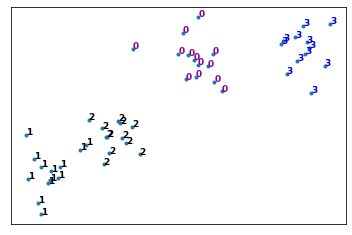

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

Q4. Redo the agglomerative clustering playing with the <b> n_clusters </b> parameter. Can you sketch the order with which the algoritm merges the various clusters (clustering hierarchy)?

### Dendrogram Associated for the Agglomerative Hierarchical Clustering
Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X2 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)

In [ ]:
from scipy.spatial import distance_matrix 

#X1, y1 = make_blobs(n_samples=50, random_state=0, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
X1, y1 = make_blobs(n_samples=10, random_state=0, centers=1, cluster_std=0.9)
dist_matrix = distance_matrix(X1,X1) 
#print(dist_matrix)

#print(np.diag(dist_matrix))

#np.sum(np.transpose(dist_matrix) - dist_matrix)

Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul> <br>
Save the result to a variable called <b> Z </b>

In [ ]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(dist_matrix, 'average')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<ul> <li> Z </li> </ul>

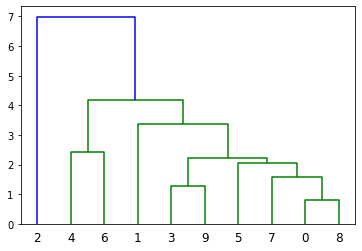

In [ ]:
dendro = hierarchy.dendrogram(Z)

Q5. Does this dendrogram correspond to what you sketched for the previous question? Check how the dedrogram changes as a function of the clustering method. 

---
# Clustering on Vehicle dataset

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacture to make decision about new models simply.

### Download data
To download the data, we will use **`!wget`**. To download the data, we will use `!wget` to download it from IBM Object Storage. 

In [ ]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2022-03-23 13:22:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2022-03-23 13:22:12 (132 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



## Read data
lets read dataset to see what features the manufacturer has collected about the existing models.

In [ ]:
# pandas is the standard library to deal with large data sets
import pandas as pd

filename = 'cars_clus.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


### Data Cleaning
A large part of the job of a data scientist is cleaning the data before doing any analysis.

Q6. Can you understand what the code below is doing?

In [ ]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


### Feature selection
Lets select our feature set:

In [ ]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Normalization
Now we can normalize the feature set. __MinMaxScaler__ transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

Q7. Why do we actually need to do this?

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

## Clustering using Scipy
In this part we use Scipy agglomerative clustering to cluster the dataset:  
Q8. First, we calculate the pairwise distance matrix. Hint. Check whay scipy.spatial.distance has to offer.

Q9. Is your distance matrix symmetric? How can you easily check that in numpy?

In [ ]:
from scipy.spatial.distance import euclidean

leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = euclidean(feature_mtx[i], feature_mtx[j])

In [ ]:
from scipy.spatial.distance import pdist, squareform

D2 = pdist(feature_mtx)

In [ ]:
a = D - squareform(D2)
a.sum()

4.621303340002214e-15

Q10. Looking at the code we used above, use scipy to perform an agglomerative clustering with the distance matrix you just calculated.

In [ ]:
Z = hierarchy.linkage(D, 'complete')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering. So you can use a cutting line:

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

Also, you can determine the number of clusters directly:

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

Now we can plot the dendrogram

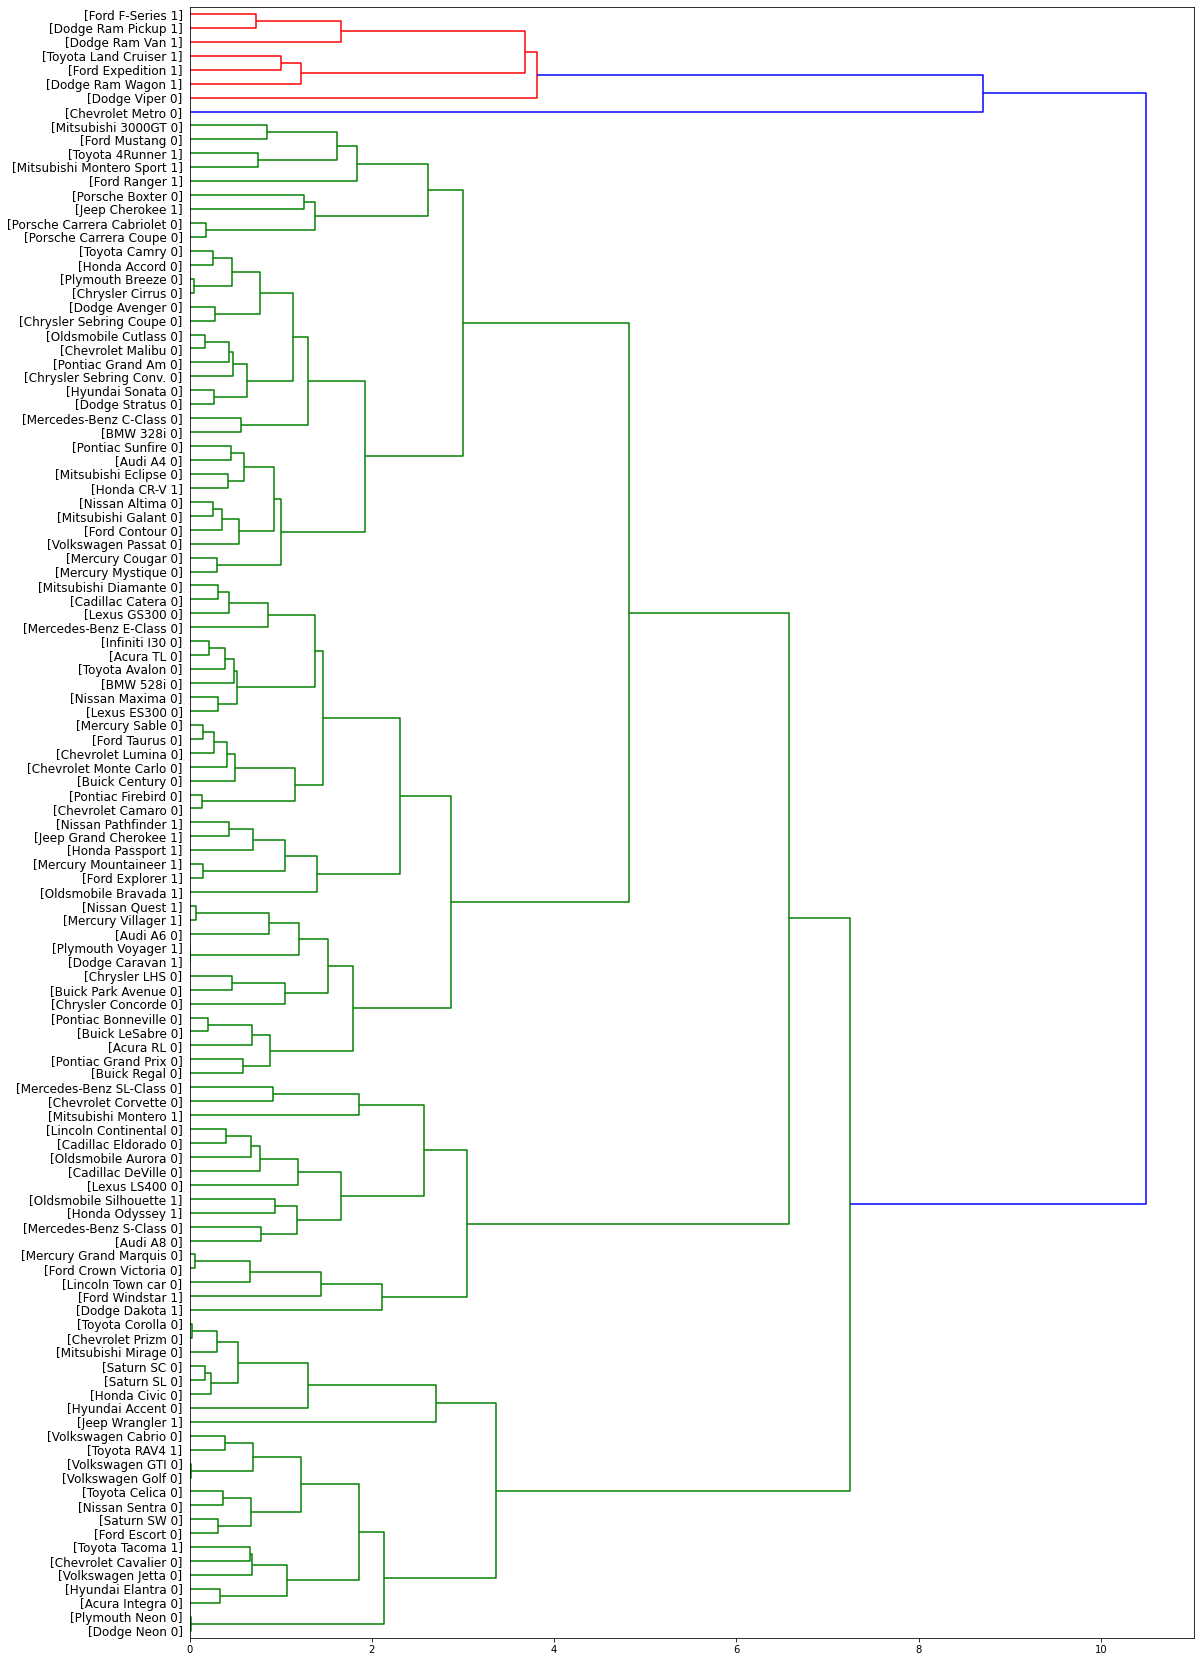

In [ ]:
fig, ax = plt.subplots(figsize=(18,30))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Notebook adapted from: https://colab.research.google.com/github/Gurubux/CognitiveClass-ML/blob/master/Course_MachineLearningWithPython/5-Clustering/ML0101EN-Clus-Hierarchical-Cars-py-v1.ipynb#scrollTo=8GgMW0CiABdR